## p.382

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
columns = ['sepal length','sepal width','petal length','petal width']

In [5]:
irisDF = pd.DataFrame(iris.data,columns=columns)
irisDF['target'] = iris.target
irisDF.head(1)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

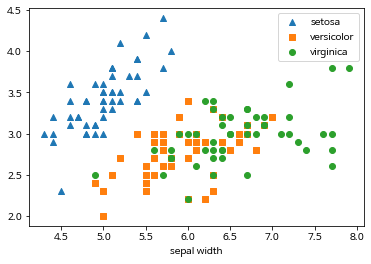

In [8]:
markers = ['^','s','o']
for i,marker in enumerate(markers): 
    x_axis_data = irisDF[irisDF['target']==i]['sepal length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.xlabel('sepal width')
plt.show()

## p384

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [12]:
import numpy as np
np.round(iris_scaled.mean())

-0.0

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(2)
iris_pca = pca.fit_transform(iris_scaled)

In [15]:
iris_scaled.shape,iris_pca.shape

((150, 4), (150, 2))

In [17]:
pca_columns = ['pca1','pca2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(1)

,pca1,pca2,target
0,-2.264703,0.480027,0


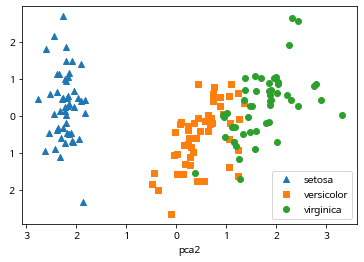

In [20]:
markers = ['^','s','o']
for i,marker in enumerate(markers): 
    x_axis_data = irisDF_pca[irisDF['target']==i]['pca1']
    y_axis_data = irisDF_pca[irisDF['target']==i]['pca2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('pca1')
plt.xlabel('pca2')
plt.show()

In [22]:
pca.explained_variance_ratio_.sum() #전체에서 96%는 변동성을 나타낸다.

0.9581320720000164

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [24]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [25]:
pca_X = irisDF_pca[['pca1','pca2']]
scores = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.88 0.88 0.88]
0.88
